# Выбор локации для скважины

Мы получили заказ от добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определим значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание проекта


Нам необходимо выбрать, в каком регионе бурить новую скважину. На основании данных о пробах нефти из 3 регионов построим  модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

## Загрузка и подготовка данных

Загрузим данные по месторождениям нефти, изучим их и подготовим данные для построения моделей.

1.1.Загрузим библиотеки, необходимые в проекте

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
import warnings
warnings.filterwarnings("ignore")

1.2. Загрузим и изучим данные

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

1 регион

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.dtypes #посмотрим типы данных

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [6]:
data_0.isna().sum() #посмотрим, есть ли пропущенные значения

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
#Проверим на дубликаты
data_0.duplicated().sum()

0

2 регион

In [8]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_1.dtypes #посмотрим типы данных

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [11]:
data_1.isna().sum() #посмотрим, есть ли пропущенные значения

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
#Проверим на дубликаты
data_1.duplicated().sum()

0

3 регион

In [13]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
data_2.dtypes #посмотрим типы данных

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [16]:
data_2.isna().sum() #посмотрим, есть ли пропущенные значения

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
#Проверим на дубликаты
data_2.duplicated().sum()

0

1.3. Удалим столбец "id" для того, чтобы в дальнейшем мы могли обучать модель с помощью выборки из наших данных. Этот столбец не нужен нам для дальнейших расчетов.

In [18]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
print(data_0)

             f0        f1        f2     product
0      0.705745 -0.497823  1.221170  105.280062
1      1.334711 -0.340164  4.365080   73.037750
2      1.022732  0.151990  1.419926   85.265647
3     -0.032172  0.139033  2.978566  168.620776
4      1.988431  0.155413  4.751769  154.036647
...         ...       ...       ...         ...
99995  0.971957  0.370953  6.075346  110.744026
99996  1.392429 -0.382606  1.273912  122.346843
99997  1.029585  0.018787 -1.348308   64.375443
99998  0.998163 -0.528582  1.583869   74.040764
99999  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 4 columns]


Вывод:
1. Для нашего исследования для каждого из 3 рассмотриваемых регионов у нас есть данные о 99999 замерах качества нефти на месторождениях;
2. Явных дубликатов нет;
3. Пропущенных значений нет;
4. Удалили столбец"id".

## Обучение и проверка модели

Разобьем данные на выборки и исследуем модели.

2.1. Разобьем данные на выборки (25 % - валидационная, 75 % - обучающая согласно заданию)

In [19]:
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, 
                                                                                  test_size=0.25, random_state=12345)
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, 
                                                                                  test_size=0.25, random_state=12345)

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, 
                                                                                  test_size=0.25, random_state=12345)

2.2. проведем масштабирование

In [20]:
numeric = ['f0', 'f1', 'f2'] #зафиксируем численные признаки
scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_0.fit(features_train_0[numeric])
scaler_1.fit(features_train_1[numeric])    
scaler_2.fit(features_train_2[numeric])   

StandardScaler()

In [21]:
features_train_0[numeric] = scaler_0.transform(features_train_0[numeric])  #масштабируем численные признаки обучающей выборки
print(features_train_0.head())

features_train_1[numeric] = scaler_1.transform(features_train_1[numeric])  #масштабируем численные признаки обучающей выборки
print(features_train_1.head())

features_train_2[numeric] = scaler_2.transform(features_train_2[numeric])  #масштабируем численные признаки обучающей выборки
print(features_train_2.head())
features_train_0.dtypes

             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255
             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821


f0    float64
f1    float64
f2    float64
dtype: object

In [22]:
features_valid_0[numeric] = scaler_0.transform(features_valid_0[numeric])  #масштабируем численные признаки валидационной выборки
print(features_valid_0.head())
features_valid_1[numeric] = scaler_1.transform(features_valid_1[numeric])  #масштабируем численные признаки валидационной выборки
print(features_valid_1.head())
features_valid_2[numeric] = scaler_2.transform(features_valid_2[numeric])  #масштабируем численные признаки валидационной выборки
print(features_valid_2.head())

             f0        f1        f2
71751  0.517917 -0.610097 -0.126226
80493  0.568391 -0.086063 -0.814914
2655   0.805688 -1.613289 -1.341342
53233  0.222503 -1.355437 -0.597275
91141 -0.087941  1.433113 -0.544588
             f0        f1        f2
71751 -0.168616  0.571372  0.297471
80493  0.878384 -1.772903 -0.293901
2655  -0.852976 -0.004986 -0.876502
53233  1.496940 -1.146077 -0.294011
91141  0.552177  0.057961 -1.457764
             f0        f1        f2
71751 -0.836717 -2.227439 -0.078489
80493 -0.821648  0.740237 -1.000811
2655  -2.651336 -0.235721 -0.244546
53233  1.077998  0.938090  0.511313
91141 -1.173938  2.387270  1.034363


2.3. Обучим модели, сделаем предсказания

In [23]:
model_0 = LinearRegression() 
model_0.fit(features_train_0, target_train_0) # обучаем модель линейной регрессии на тренировочной выборке
predict_0=model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predict_0)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_0)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_0, predict_0))
    


Среднеквадратичная ошибка RMSE: 37.58
Коэффициент детерминации: 0.28


In [24]:
model_1 = LinearRegression() 
model_1.fit(features_train_1, target_train_1) # обучаем модель линейной регрессии на тренировочной выборке
predict_1=model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_1)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_1, predict_1))
    

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


In [25]:
model_2 = LinearRegression() 
model_2.fit(features_train_2, target_train_2) # обучаем модель линейной регрессии на тренировочной выборке
predict_2=model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_2)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_2, predict_2))

Среднеквадратичная ошибка RMSE: 40.03
Коэффициент детерминации: 0.21


2.4. Сохраним предсказания и правильные ответы

In [26]:
print('1 регион:\n- предсказания модели: "predict_0"\n- правильные ответы: "target_valid_0"')
print()
print('2 регион:\n- предсказания модели: "predict_1"\n- правильные ответы: "target_valid_1"')
print()
print('3 регион:\n- предсказания модели: "predict_2"\n- правильные ответы: "target_valid_2"')

1 регион:
- предсказания модели: "predict_0"
- правильные ответы: "target_valid_0"

2 регион:
- предсказания модели: "predict_1"
- правильные ответы: "target_valid_1"

3 регион:
- предсказания модели: "predict_2"
- правильные ответы: "target_valid_2"


2.5. Напечатаем на экране средний запас предсказанного сырья и RMSE по регионам

In [27]:
mean_pred = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE'], columns=['1 регион','2 регион','3 регион'])
mean_pred['1 регион'] = predict_0.mean(), rmse_0
mean_pred['2 регион'] = predict_1.mean(), rmse_1
mean_pred['3 регион'] = predict_2.mean(), rmse_2
mean_pred

,1 регион,2 регион,3 регион
средний запас предсказанного сырья,92.592568,68.728547,94.965046
RMSE,37.579422,0.893099,40.029709


Вывод:
1. Предсказательные способности моделей для 1 и 3 регионов примерно одинаковые (согласно параметрам RMSE);
2. У 2 модели наименьшее RMSE, соответственно 2 модель лучше для прогнозирования.

## Подготовка к расчёту прибыли

3.1. Объявим необходимые переменные

In [28]:
explore_points = 500 # количество точек для исследования
mining_points = 200 # количество точек для разработки
mining_budget = 10_000 # бюджет на разработку скважин в регионе в млн. руб.
income_per_barrel = 0.45 # доход с 1 тыс баррель в млн. руб
loses_probability = 0.025 # максимальная вероятность убытков
bootstrap_samples = 1000 #количество выборок

3.2. Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины

In [29]:
budget_per_borehole = mining_budget / mining_points # затраты на разработку одной скважины
sufficient_product_volume = budget_per_borehole / income_per_barrel 
print('Необходимый объем сырья для безубыточной разработки 1 скважины в тыс. баррелей {:.2f}'.format(sufficient_product_volume))

Необходимый объем сырья для безубыточной разработки 1 скважины в тыс. баррелей 111.11


Вывод:
Необходимый объем сырья для безубыточной разработки 1 скважины в тыс. баррелей 111.11

## Расчёт прибыли и рисков 

Выберем 200 скважин с лучшими прогнозами, определим объем произведенного сырья и прибыль в 200 выбранных по предсказаниям модели скважин

In [30]:
def income_calc(target_valid, predict):
    pred_choice =  pd.Series(predict).sort_values(ascending=False).head(200) # выбираем 200 скважин с максимальным объемом нефти
    target_choice = target_valid.reset_index(drop=True)[pred_choice.index] # определяем верные значения для отобранных 200 скважин
    return target_choice.sum()
print('Объем произведенного сырья в 200 выбранных по предсказаниям модели скважин составит:')
print('для региона 1 - {:.3f} тыс. бар.'.format(income_calc(target_valid_0, predict_0)))
print('для региона 2 - {:.3f} тыс. бар.'.format(income_calc(target_valid_1, predict_1)))
print('для региона 3 - {:.3f} тыс. бар.'.format(income_calc(target_valid_2, predict_2)))
print('Прибыль с 200 выбранных по предсказаниям модели скважин составит:')
print('для региона 1 - {:.3f} млн. руб.'.format(income_calc(target_valid_0, predict_0)*income_per_barrel - mining_budget))
print('для региона 2 - {:.3f} млн. руб.'.format(income_calc(target_valid_1, predict_1)*income_per_barrel - mining_budget))
print('для региона 3 - {:.3f} млн. руб.'.format(income_calc(target_valid_2, predict_2)*income_per_barrel - mining_budget))



Объем произведенного сырья в 200 выбранных по предсказаниям модели скважин составит:
для региона 1 - 29601.836 тыс. бар.
для региона 2 - 27589.082 тыс. бар.
для региона 3 - 28245.222 тыс. бар.
Прибыль с 200 выбранных по предсказаниям модели скважин составит:
для региона 1 - 3320.826 млн. руб.
для региона 2 - 2415.087 млн. руб.
для региона 3 - 2710.350 млн. руб.


Вывод:
все 3 рассматриваемых региона обладают большими объемами сырья и потенциально прибыльны (прогнозируемая прибыль от 2415.087 млн. руб. до  3320.826 млн. руб.)

## Расчет рисков и прибыли для каждого региона

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [31]:
#модифицируем функцию из предыдущего пункта
def revenue (target_valid, predict, mining_points):
    pred_choice = pd.Series(predict).sort_values(ascending=False) # сортируем скважины по значениям их предсказаний
    target_choice = target_valid.iloc[pred_choice.index][:mining_points] # определяем верные значения для отобранных случайных скважин и берем только нужное количество
    income = target_choice.sum() * income_per_barrel # доход в млн. рублей
    return income


In [32]:
# создадим ф-ю для применения для каждого региона
def income_distribution (predict, target_valid, bootstrap_samples, explore_points):
    state = np.random.RandomState(12345)
    
    count = 0 # счетчик вероятности убытков в регионе

    values = [] # значения выручек для 1000 выборок
    
    for i in range(bootstrap_samples): 
    
        # у целевого признака выборки сбрасываем индексы и случайно выбираем нужное количество скважин
        target_subsample = target_valid.reset_index(drop=True).sample(explore_points, replace=True, random_state=state)
        # из предсказаний выбираем строки соответствующие отобранным строкам в целевом признаке
        probs_subsample = predict[target_subsample.index]
        # считаем выручку для отобранных строк для нужного количества скважин
        rev = revenue(target_subsample, probs_subsample, mining_points) - mining_budget
        values.append(rev)
        
        #проверяем не является выборка убыточной, если является, то увеличиваем счетчик
        if rev < 0:
            count +=1

    values = pd.Series(values)
    
    
    mean = values.mean() # средняя выручка
    print("Средняя выручка:", mean, 'млн рублей')
    
    # посчитаем и выведем 95-% доверительный интервал
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), np.std(values, ddof=1))
    print("95%-ый доверительный интервал:", confidence_interval)
    
    pvalue = 1. * count / bootstrap_samples
    if pvalue < loses_probability:
        print("Вероятность убытков равна {:.2%}, что меньше допустимой, регион подходит по критериям".format(pvalue))
    else:
        print("Вероятность убытков равна {:.2%}, что больше допустимой, регион не подходит по критериям".format(pvalue))    
    
    # построим распределение выручки по региону
    plt.figure()
    _ = plt.hist(values,  bins=100)
    
    # левая граница доверительного интервала
    left_x, left_y = [confidence_interval[0],confidence_interval[0]], [0, 30]
    # правая граница доверительного интервала
    right_x, right_y = [confidence_interval[1],confidence_interval[1]], [0, 30]
    plt.title('Гистограмма распределения прибыли')
    plt.xlabel('Прибыль в млн. рублей')
    plt.plot(left_x, left_y, right_x, right_y, marker = 'o')

Для первого региона следующие показатели:
Средняя выручка: 396.16498480237146 млн рублей
95%-ый доверительный интервал: (-127.02340762733172, 919.3533772320746)
Вероятность убытков равна 6.90%, что больше допустимой, регион не подходит по критериям


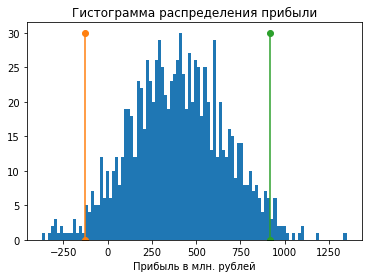

In [33]:
print('Для первого региона следующие показатели:')
income_distribution (predict_0, target_valid_0, bootstrap_samples, explore_points)

Для второго региона следующие показатели:
Средняя выручка: 456.04510578666105 млн рублей
95%-ый доверительный интервал: (48.17905135317801, 863.9111602201441)
Вероятность убытков равна 1.50%, что меньше допустимой, регион подходит по критериям


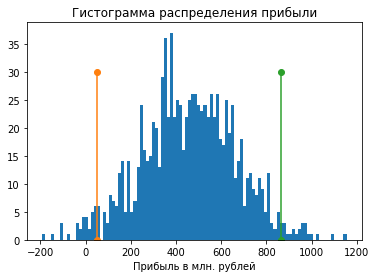

In [34]:
print('Для второго региона следующие показатели:')
income_distribution (predict_1, target_valid_1, bootstrap_samples, explore_points)

Для третьего региона следующие показатели:
Средняя выручка: 404.4038665683571 млн рублей
95%-ый доверительный интервал: (-131.85736408440744, 940.6650972211216)
Вероятность убытков равна 7.60%, что больше допустимой, регион не подходит по критериям


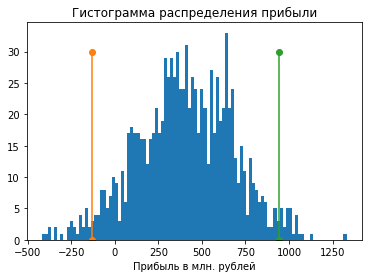

In [35]:
print('Для третьего региона следующие показатели:')
income_distribution (predict_2, target_valid_2, bootstrap_samples, explore_points)

Вывод:
1. Во втором регионе самая высокая средняя выручка (456.0393834020113 млн рублей) и самый низкий риск убытков(вероятность убытков равна 1.50%);
2. Только во втором регионе риск убытков меньше 2,5 %, что соответствует условию;
3. В связи с вышесказанным нам следует выбрать для разработки 2 регион.

# Общий вывод:
на основании построенной нами модели линейной регрессии и расчетов прогнозируемой прибыли и убытков с помощью Bootstrap мы сделали вывод, что второй регион наиболее выгоден для разработки.